In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data import *
from features import *
from stats import *
from preprocess import *
from step import Step
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [24]:
step = Step(load_mnm_spatial)
# young = Step(subset, load, key='monkey', value='YOUNG')
# gtn = Step(gt_n_trials, young, n=10)
# win = Step(win_cts_by_trial, gtn, wins=[[1500, 3000]])
# wcbw = Step(win_cts_by_win, win)
# stat = Step(stat_tests, wcbw)
# sigt = Step(sig_stat, stat, stat='t_p', alpha=1e-3)
# sel = Step(select, sigt)
step = Step(subset, step, key='cell', value='NIN-PFC-AD-PRE-145')
step = Step(win_cts_by_trial, step, win_start=1000, win_end=4000, win_size=125, win_stride=125)
step = Step(win_cts_by_win, step)
step = Step(stat_tests, step)

In [29]:
win_cts = step()['win_cts']
step()['stats_by_cell_win']

t_p  \
cell               win                                                      
NIN-PFC-AD-PRE-145 0    [0.005504990478028941, 0.6345851752064458, 0.8...   
                   1    [0.9231844462925519, 0.22926087873308815, 0.44...   
                   2    [0.14981812822175175, 0.14981812822175175, 0.9...   
                   3    [0.024920216287411586, 0.684451346644656, 0.07...   
                   4    [0.9542893950399141, 0.2706184192895968, 0.752...   
                   5    [0.03876383804654577, 0.22208909356434303, 0.0...   
                   6    [0.001086816067606481, 0.027421264425379423, 0...   
                   7    [0.6789660323011961, 0.722789577601098, 0.4266...   
                   8    [0.2771061883959939, 0.677960062094215, 0.0427...   
                   9    [0.8882967269916724, 0.9172803267634977, 0.000...   
                   10   [0.1189829824731311, 0.4900569827133452, 0.851...   
                   11   [0.01855446220744851, 0.8194897049848404, 0.86...   
                   12   [0.0948443360743618, 0.06584899277772867, 0.48...   
                   13   [1.4465282312172164e-05, 0.532424140191016, 0....   
                   14   [6.310746228224382e-05, 0.046995203687315405, ...   
                   15   [0.24616384184256193, 0.15013359268592494, 0.2...   
                   16   [0.27428195084578977, 0.07606501926216322, 0.4...   
                   17   [0.7034009764963027, 0.5743341172254712, 0.961...   
                   18   [0.0005054310358205952, 0.5853102638968695, 0....   
                   19   [0.00356378637520579, 0.46780213172109986, 0.5...   
                   20   [0.05844622971538624, 0.33921604148800577, 0.2...   
                   21   [0.15001897616646856, 0.3519169873119281, 0.31...   
                   22   [0.02605110614008234, 0.9598948823003816, 0.93...   
                   23   [0.6502785174746769, 0.9620132291546392, 0.327...   

                             min_t_p  min_t_p_pos   anova_p  kruskal_p  
cell               win                                                  
NIN-PFC-AD-PRE-145 0    4.827718e-03            7  0.038219   0.009775  
                   1    2.123607e-01            3  0.749566   0.111651  
                   2    9.626505e-02            6  0.329514   0.510456  
                   3    2.492022e-02            0  0.028475   0.233867  
                   4    9.690393e-04            5  0.075894   0.211934  
                   5    3.348365e-03            3  0.013010   0.003544  
                   6    1.086816e-03            0  0.016166   0.064868  
                   7    3.353209e-03            7  0.030437   0.015495  
                   8    4.278344e-02            2  0.198962   0.398856  
                   9    3.122165e-04            2  0.009400   0.014605  
                   10   9.541960e-02            6  0.345048   0.099359  
                   11   1.855446e-02            0  0.230701   0.290051  
                   12   6.584899e-02            1  0.396396   0.228419  
                   13   1.446528e-05            0  0.002590   0.034263  
                   14   6.310746e-05            0  0.000087   0.000089  
                   15   4.467344e-02            5  0.055984   0.017757  
                   16   3.652427e-03            6  0.047610   0.000016  
                   17   4.572028e-07            3  0.000330   0.597859  
                   18   5.054310e-04            0  0.016158   0.081176  
                   19   3.563786e-03            0  0.026203   0.072482  
                   20   5.004620e-02            6  0.107196   0.058689  
                   21   2.122220e-02            3  0.091344   0.025787  
                   22   1.775090e-02            7  0.151167   0.174719  
                   23   5.657593e-02            5  0.227380   0.406402

In [19]:
# turn values of cell into columns
win_cts = win_cts.reset_index()
win_cts = win_cts.pivot(index=['position', 'trial'], columns='win', values='win_cts')
win_cts

win               0    1    2    3     4    5    6     7    8    9   ...   14  \
position trial                                                       ...        
0        0       2.0  2.0  0.0  1.0   1.0  2.0  1.0   0.0  1.0  2.0  ...  4.0   
         1       2.0  1.0  3.0  0.0   1.0  0.0  0.0   3.0  1.0  5.0  ...  2.0   
         2       0.0  0.0  0.0  0.0   1.0  0.0  1.0   0.0  4.0  1.0  ...  1.0   
         3       1.0  4.0  0.0  1.0   2.0  2.0  2.0   0.0  1.0  2.0  ...  5.0   
         4       1.0  1.0  1.0  0.0   1.0  6.0  0.0   0.0  1.0  0.0  ...  1.0   
...              ...  ...  ...  ...   ...  ...  ...   ...  ...  ...  ...  ...   
7        25      1.0  2.0  0.0  1.0   0.0  1.0  0.0   2.0  0.0  1.0  ...  0.0   
         26      1.0  1.0  1.0  2.0   1.0  2.0  0.0   0.0  2.0  2.0  ...  3.0   
         27      1.0  5.0  0.0  2.0   2.0  2.0  1.0   2.0  0.0  3.0  ...  1.0   
         28      2.0  2.0  2.0  4.0  10.0  5.0  2.0   3.0  3.0  3.0  ...  2.0   
         29     16.0  2.0  0.0  1.0   1.0  0.0  2.0  11.0  3.0  2.0  ...  2.0   

win              15   16   17   18    19    20   21   22   23  
position trial                                                 
0        0      2.0  1.0  0.0  3.0   1.0   2.0  0.0  2.0  0.0  
         1      0.0  0.0  1.0  0.0   1.0   1.0  0.0  0.0  3.0  
         2      1.0  2.0  0.0  0.0   1.0   2.0  1.0  0.0  0.0  
         3      1.0  0.0  2.0  5.0   1.0   1.0  1.0  0.0  0.0  
         4      1.0  1.0  1.0  1.0   2.0   8.0  0.0  0.0  0.0  
...             ...  ...  ...  ...   ...   ...  ...  ...  ...  
7        25     0.0  3.0  1.0  0.0   0.0   0.0  0.0  1.0  0.0  
         26     0.0  2.0  2.0  2.0  10.0  10.0  0.0  2.0  0.0  
         27     6.0  0.0  2.0  8.0   0.0   0.0  1.0  1.0  1.0  
         28     1.0  1.0  2.0  3.0   1.0   8.0  1.0  1.0  0.0  
         29     3.0  3.0  2.0  1.0   3.0   1.0  2.0  0.0  1.0  

[247 rows x 24 columns]

In [20]:
ss = StandardScaler()
wc = ss.fit_transform(win_cts)
win_cts = pd.DataFrame(wc, columns=win_cts.columns, index=win_cts.index)
win_cts

win                   0         1         2         3         4         5   \
position trial                                                               
0        0      0.125886  0.090226 -0.765194 -0.423515 -0.396190  0.135026   
         1      0.125886 -0.322475  0.707556 -0.786737 -0.396190 -0.742642   
         2     -0.726000 -0.735176 -0.765194 -0.786737 -0.396190 -0.742642   
         3     -0.300057  0.915628 -0.765194 -0.423515  0.069805  0.135026   
         4     -0.300057 -0.322475 -0.274277 -0.786737 -0.396190  1.890362   
...                  ...       ...       ...       ...       ...       ...   
7        25    -0.300057  0.090226 -0.765194 -0.423515 -0.862184 -0.303808   
         26    -0.300057 -0.322475 -0.274277 -0.060292 -0.396190  0.135026   
         27    -0.300057  1.328329 -0.765194 -0.060292  0.069805  0.135026   
         28     0.125886  0.090226  0.216639  0.666153  3.797762  1.451528   
         29     6.089090  0.090226 -0.765194 -0.423515 -0.396190 -0.742642   

win                   6         7         8         9   ...        14  \
position trial                                          ...             
0        0     -0.334309 -0.773397 -0.365649  0.086272  ...  0.642055   
         1     -0.707948  0.734727 -0.365649  1.364828  ... -0.053505   
         2     -0.334309 -0.773397  0.943269 -0.339913  ... -0.401284   
         3      0.039330 -0.773397 -0.365649  0.086272  ...  0.989835   
         4     -0.707948 -0.773397 -0.365649 -0.766098  ... -0.401284   
...                  ...       ...       ...       ...  ...       ...   
7        25    -0.707948  0.232019 -0.801955 -0.339913  ... -0.749064   
         26    -0.707948 -0.773397  0.070657  0.086272  ...  0.294275   
         27    -0.334309  0.232019 -0.801955  0.512458  ... -0.401284   
         28     0.039330  0.734727  0.506963  0.512458  ... -0.053505   
         29     0.039330  4.756390  0.506963  0.086272  ... -0.053505   

win                   15        16        17        18        19        20  \
position trial                                                               
0        0      0.053477 -0.300938 -0.796865  0.398995 -0.427626 -0.029575   
         1     -0.680343 -0.743389 -0.323726 -0.802857 -0.427626 -0.377435   
         2     -0.313433  0.141513 -0.796865 -0.802857 -0.427626 -0.029575   
         3     -0.313433 -0.743389  0.149412  1.200230 -0.427626 -0.377435   
         4     -0.313433 -0.300938 -0.323726 -0.402239 -0.112332  2.057583   
...                  ...       ...       ...       ...       ...       ...   
7        25    -0.680343  0.583963 -0.323726 -0.802857 -0.742920 -0.725295   
         26    -0.680343  0.141513  0.149412 -0.001622  2.410023  2.753303   
         27     1.521117 -0.743389  0.149412  2.402082 -0.742920 -0.725295   
         28    -0.313433 -0.300938  0.149412  0.398995 -0.427626  2.057583   
         29     0.420387  0.583963  0.149412 -0.402239  0.202963 -0.377435   

win                   21        22        23  
position trial                                
0        0     -0.867212  0.049432 -0.720227  
         1     -0.867212 -0.668788  0.553492  
         2     -0.408537 -0.668788 -0.720227  
         3     -0.408537 -0.668788 -0.720227  
         4     -0.867212 -0.668788 -0.720227  
...                  ...       ...       ...  
7        25    -0.867212 -0.309678 -0.720227  
         26    -0.867212  0.049432 -0.720227  
         27    -0.408537 -0.309678 -0.295654  
         28    -0.408537 -0.309678 -0.720227  
         29     0.050139 -0.668788 -0.295654  

[247 rows x 24 columns]

In [21]:
# win_cts = win_cts.loc[:,0,:]
# win_cts

In [22]:
pca = PCA(n_components=5)
wc = pca.fit_transform(win_cts)
# win_cts = pd.DataFrame(wc, columns=['PC1', 'PC2'], index=win_cts.index)
# win_cts

ValueError: Shape of passed values is (247, 5), indices imply (247, 2)

In [23]:
pca.explained_variance_ratio_

array([0.19123777, 0.08485719, 0.07014858, 0.0638021 , 0.05585236])

In [10]:
# win_cts.index.get_level_values('win').unique().array

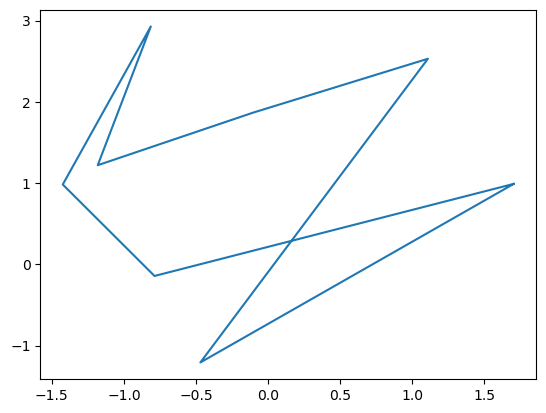

In [58]:
pts2 = pts.values
pts2 = np.vstack([pts2, pts2[0]])
plt.plot(pts2[:,0], pts2[:,1], '-')

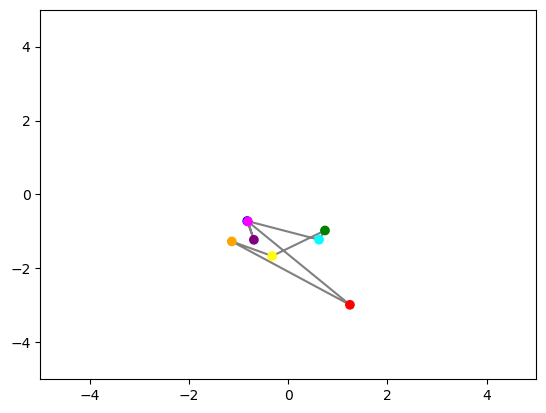

In [59]:
# for w in win_cts.index.get_level_values('win').unique():
#     win_cts.xs(w, level='win').plot.scatter(x='PC1', y='PC2',c=colors)

fig, ax = plt.subplots()
pts = win_cts.xs(0, level='win')[['PC1', 'PC2']]
pts2 = pts.values
pts2 = np.vstack([pts2, pts2[0]])
lines = ax.plot(pts2[:,0], pts2[:,1], '-', c='gray')
scat = ax.scatter(pts['PC1'], pts['PC2'], c=colors, zorder=3)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

def update(i):
    pts = win_cts.xs(i, level='win')[['PC1', 'PC2']]
    pts2 = pts.values
    pts2 = np.vstack([pts2, pts2[0]])
    for l in lines:
        l.set_data(pts2[:,0], pts2[:,1])
    scat.set_offsets(win_cts.xs(i, level='win')[['PC1', 'PC2']])
    return (scat, *lines)

ani = animation.FuncAnimation(fig, update, frames=win_cts.index.get_level_values('win').unique(), interval=500, blit=True)
ani.save('ani.gif', writer='pillow')